In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

LIGHT_PATH = '../images/expt_6/light.tif'
DARK_PATH = '../images/expt_6/dark.tif'
LOW_CONTRAST_PATH = '../images/expt_6/low_contrast.tif'


def readImage(imagePath, imageName):
    # read the image
    image_original = mpimg.imread(imagePath)
    image = image_original.copy() # else it is read only

    if len(image.shape) == 3:
        # is a color image
        # converting to grayscale: avg method
        R = image[:,:, 0]
        G = image[:,:, 1]
        B = image[:,:, 2]
        grayscale = (R/3 + G/3 + B/3)
    else:
        # is a grayscale image
        grayscale = np.array(image_original.copy())

    plt.imshow(grayscale, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Original ' + imageName)
    
    return grayscale


def getFrequencies(grayImage):
    freq = [0 for i in range(256)]
    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            index = int(grayImage[i, j])
            freq[index] = freq[index] + 1
            
    return freq


def plotHistogram(grayImage, imageName):
    # get frquencies of each gray level
    freq = getFrequencies(grayImage)
   
    # plot
    plt.plot([i for i in range(256)], freq, '.')
    plt.vlines(x=[i for i in range(256)], ymin=0, ymax=freq, color='skyblue')
    plt.title('Histogram for ' + imageName)
    


def equaliseImage(grayImage, imageName):    
    # histogram equilisation
    # freq -> frequency of each gray level
    # cSum -> cummulative sum
    
    freq = getFrequencies(grayImage)
    
    cSum = [0 for i in range(256)]
    
    cSum[0] = freq[0]
    for i in range(1, 256):
        cSum[i] = freq[i] + cSum[i-1]
        
    # norm -> normalised cSum = cSum / cSum[255] * 255
    norm = [round((i/cSum[255]) * 255) for i in cSum]
    
    normalised_hist = [0 for i in  range(256)]
    
    for i in range(256):
        noramlised_gl = norm[i]
        normalised_hist[noramlised_gl] = normalised_hist[noramlised_gl] + freq[i]
        
    # reconstructing the image

    reconstructed = np.zeros(grayImage.shape)

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            index = int(grayImage[i, j])
            reconstructed[i, j] = norm[index]
            
    # plot reconstructed image        
    plt.imshow(reconstructed, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Equalised ' + imageName)
            
    return reconstructed

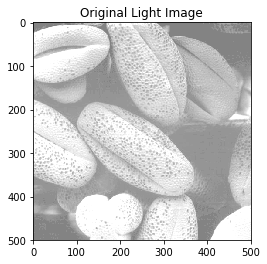

In [45]:
img1 = readImage(LIGHT_PATH, 'Light Image')

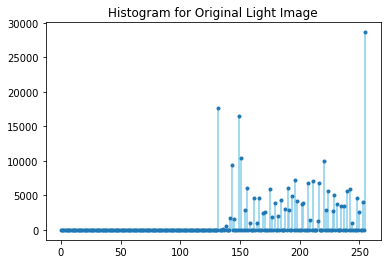

In [46]:
plotHistogram(img1, 'Original Light Image')

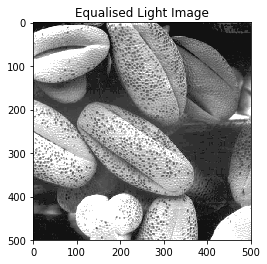

In [47]:
light_equalised = equaliseImage(img1, 'Light Image')

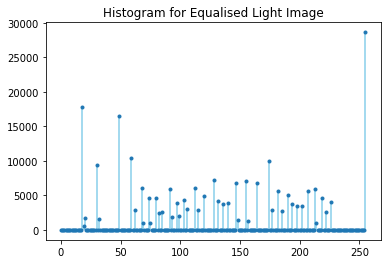

In [48]:
plotHistogram(light_equalised, 'Equalised Light Image')

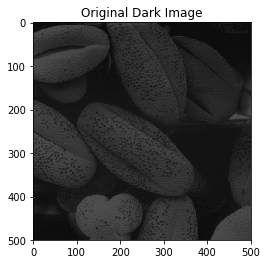

In [49]:
img2 = readImage(DARK_PATH, 'Dark Image')

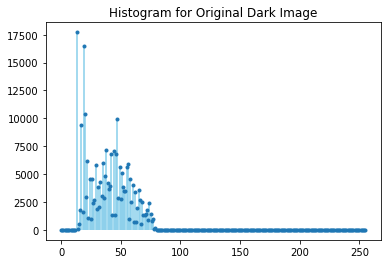

In [50]:
plotHistogram(img2, 'Original Dark Image')

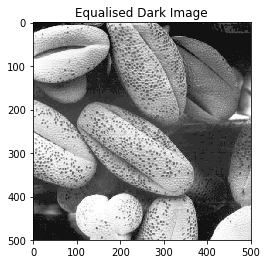

In [51]:
dark_equalised = equaliseImage(img2, 'Dark Image')

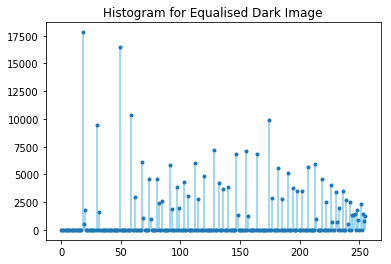

In [52]:
plotHistogram(dark_equalised, 'Equalised Dark Image')

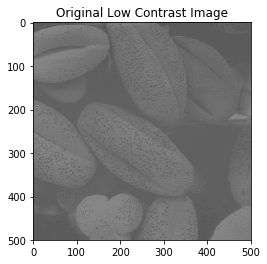

In [53]:
img3 = readImage(LOW_CONTRAST_PATH, 'Low Contrast Image')

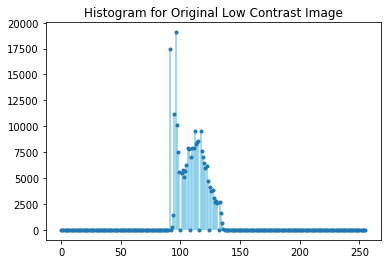

In [54]:
plotHistogram(img3, 'Original Low Contrast Image')

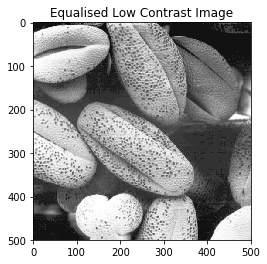

In [55]:
low_contrast_equalised = equaliseImage(img3, 'Low Contrast Image')

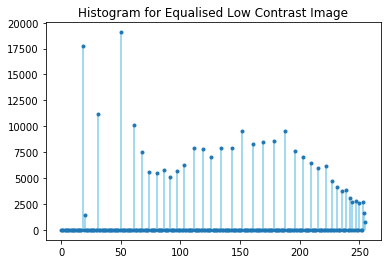

In [56]:
plotHistogram(low_contrast_equalised, 'Equalised Low Contrast Image')